In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/Train-1617360447408-1660719685476.csv")
#df2 = pd.read_csv("/content/test-1617360461595-1660719701431.csv")

In [ ]:
df.head(5)

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1.0
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0.0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1.0


In [ ]:
print(df.dtypes)

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses      float64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [ ]:
print(df.shape)

(61315, 49)


In [ ]:
df.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      1
X1                    1
X2                    1
X3                    1
X4                    1
X5                    1
X6                    1
X7                    1
X8                    1
X9                    1
X10                   1
X11                   1
X12                   1
X13                   1
X14                   1
X15                   1
X16                   1
X17                   1
X18                   1
X19                   1
X20                   1
X21             

In [ ]:
print("<==================Value count for race is ===================>")
print(df.race.value_counts())
print("<==================Value count for gender is ===================>")
print(df.gender.value_counts())
print("<==================Value count for age is ===================>")
print(df.age.value_counts())
print("<==================Value count for weight is ===================>")
print(df.weight.value_counts())
print("<==================Value count for medical_speciality is ===================>")
print(df.medical_specialty.value_counts())

<==================Value count for race is ===================>
Caucasian          45926
AfricanAmerican    11422
?                   1398
Hispanic            1215
Other                976
Asian                378
Name: race, dtype: int64
<==================Value count for gender is ===================>
Female             33240
Male               28073
Unknown/Invalid        2
Name: gender, dtype: int64
<==================Value count for age is ===================>
[70-80)     15654
[60-70)     13715
[50-60)     10456
[80-90)     10177
[40-50)      5838
[30-40)      2228
[90-100)     1694
[20-30)      1072
[10-20)       393
[0-10)         88
Name: age, dtype: int64
<==================Value count for weight is ===================>
?            59357
[75-100)       822
[50-75)        554
[100-125)      383
[125-150)      101
[25-50)         47
[0-25)          23
[150-175)       17
[175-200)        8
>200             3
Name: weight, dtype: int64
<==================Value count for medical_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrinution of Readmission')

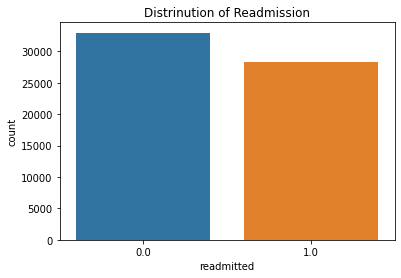

In [ ]:
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

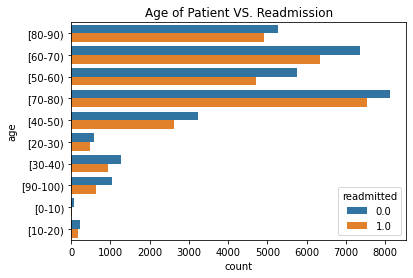

In [ ]:
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Race of a patient VS. Readmission')

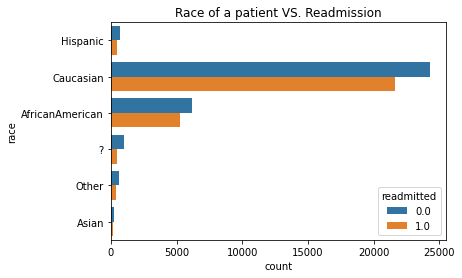

In [ ]:
sns.countplot(y= df['race'], hue = df['readmitted']).set_title('Race of a patient VS. Readmission')

Text(0.5, 1.0, 'Race of a patient VS. Readmission')

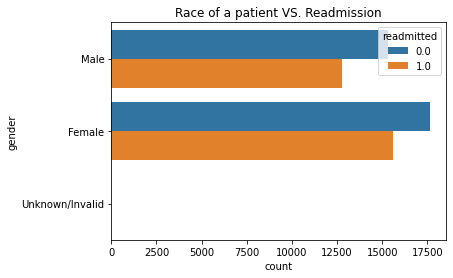

In [ ]:
sns.countplot(y= df['gender'], hue = df['readmitted']).set_title('Race of a patient VS. Readmission')

In [ ]:
df=df.drop(["weight","medical_specialty"],axis=1)

In [ ]:
df

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),4,39,1,9,...,No,No,No,No,No,No,No,No,Yes,1.0
1,57272,163571946,92631357,Caucasian,Male,[60-70),3,34,1,12,...,No,No,No,No,No,No,No,No,No,0.0
2,82347,256497366,30023982,Caucasian,Female,[50-60),6,50,2,24,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),5,63,0,14,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
4,24091,81873900,23464296,Caucasian,Male,[70-80),9,17,1,11,...,No,No,No,No,No,No,No,No,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61310,27261,89343744,25867071,Caucasian,Female,[70-80),4,18,0,23,...,No,Down,No,No,No,No,No,Ch,Yes,0.0
61311,48816,148499778,94411962,Caucasian,Male,[80-90),6,50,0,9,...,No,Steady,No,No,No,No,No,Ch,Yes,1.0
61312,81699,253590360,100799676,Caucasian,Female,[40-50),1,21,1,19,...,No,No,No,No,No,No,No,No,Yes,1.0
61313,57784,164441826,41841504,Caucasian,Female,[60-70),2,15,0,7,...,No,Steady,No,No,No,No,No,No,Yes,1.0


In [ ]:
df.replace({'race':{'?':df["race"].mode()}},inplace=True)

In [ ]:
print(df.race.value_counts())

Caucasian          47324
AfricanAmerican    11422
Hispanic            1215
Other                976
Asian                378
Name: race, dtype: int64


In [ ]:
df.groupby('age').size()

age
[0-10)         88
[10-20)       393
[20-30)      1072
[30-40)      2228
[40-50)      5838
[50-60)     10456
[60-70)     13715
[70-80)     15654
[80-90)     10177
[90-100)     1694
dtype: int64

In [ ]:
age = {'[0-10)'  :0,
          '[10-20)' :10,
          '[20-30)' :20,
          '[30-40)' :30,
          '[40-50)' :40,
          '[50-60)' :50,
          '[60-70)' :60,
          '[70-80)' :70,
          '[80-90)' :80,
          '[90-100)':90,}

df['age'] = df.age.replace(age)
df

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,80,4,39,1,9,...,No,No,No,No,No,No,No,No,Yes,1.0
1,57272,163571946,92631357,Caucasian,Male,60,3,34,1,12,...,No,No,No,No,No,No,No,No,No,0.0
2,82347,256497366,30023982,Caucasian,Female,50,6,50,2,24,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
3,89608,289891212,93606021,AfricanAmerican,Female,70,5,63,0,14,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
4,24091,81873900,23464296,Caucasian,Male,70,9,17,1,11,...,No,No,No,No,No,No,No,No,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61310,27261,89343744,25867071,Caucasian,Female,70,4,18,0,23,...,No,Down,No,No,No,No,No,Ch,Yes,0.0
61311,48816,148499778,94411962,Caucasian,Male,80,6,50,0,9,...,No,Steady,No,No,No,No,No,Ch,Yes,1.0
61312,81699,253590360,100799676,Caucasian,Female,40,1,21,1,19,...,No,No,No,No,No,No,No,No,Yes,1.0
61313,57784,164441826,41841504,Caucasian,Female,60,2,15,0,7,...,No,Steady,No,No,No,No,No,No,Yes,1.0


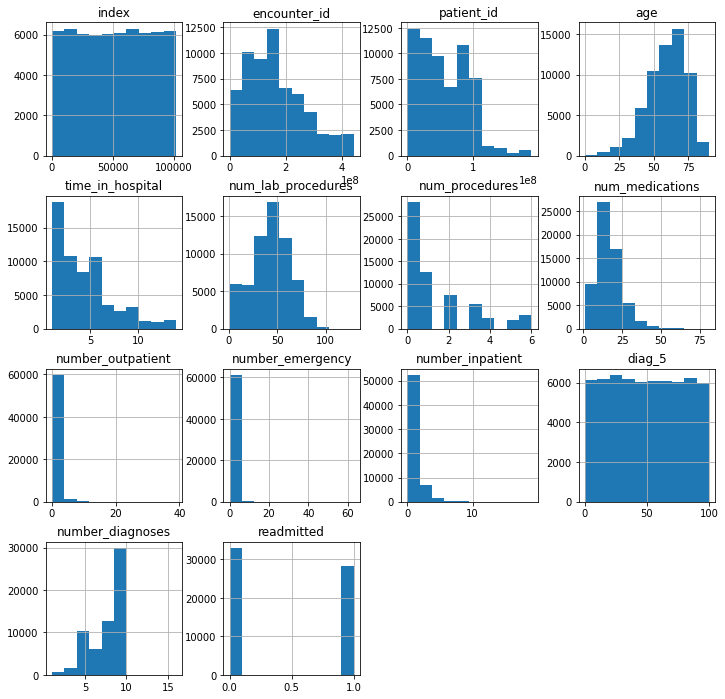

In [ ]:
df.hist(figsize=(12,12))
plt.show()

In [ ]:
df_updated = pd.get_dummies(df, columns = ['race','gender'])
print(df_updated)

       index  encounter_id  patient_id  age  time_in_hospital  \
0      69375     197029140    51521940   80                 4   
1      57272     163571946    92631357   60                 3   
2      82347     256497366    30023982   50                 6   
3      89608     289891212    93606021   70                 5   
4      24091      81873900    23464296   70                 9   
...      ...           ...         ...  ...               ...   
61310  27261      89343744    25867071   70                 4   
61311  48816     148499778    94411962   80                 6   
61312  81699     253590360   100799676   40                 1   
61313  57784     164441826    41841504   60                 2   
61314  64273     178886694    84430098   90                 5   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0                      39               1                9                  1   
1                      34               1               1

In [ ]:
#df_updated.replace({'gender':{'Male': 0, "Female":1}},inplace=True)

In [ ]:
df_updated

,index,encounter_id,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid
0,69375,197029140,51521940,80,4,39,1,9,1,1,...,Yes,1.0,0,0,0,1,0,0,1,0
1,57272,163571946,92631357,60,3,34,1,12,0,0,...,No,0.0,0,0,1,0,0,0,1,0
2,82347,256497366,30023982,50,6,50,2,24,0,0,...,Yes,1.0,0,0,1,0,0,1,0,0
3,89608,289891212,93606021,70,5,63,0,14,0,0,...,Yes,1.0,1,0,0,0,0,1,0,0
4,24091,81873900,23464296,70,9,17,1,11,0,0,...,No,1.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61310,27261,89343744,25867071,70,4,18,0,23,3,0,...,Yes,0.0,0,0,1,0,0,1,0,0
61311,48816,148499778,94411962,80,6,50,0,9,0,0,...,Yes,1.0,0,0,1,0,0,0,1,0
61312,81699,253590360,100799676,40,1,21,1,19,0,0,...,Yes,1.0,0,0,1,0,0,1,0,0
61313,57784,164441826,41841504,60,2,15,0,7,1,0,...,Yes,1.0,0,0,1,0,0,1,0,0


In [ ]:
#Feature Engineering
df_updated['total_patients']=df_updated['number_inpatient']+df_updated['number_outpatient']+df_updated['number_emergency']
df_updated=df_updated.drop(["number_inpatient","number_outpatient","number_emergency"],axis=1)

In [ ]:
#Replacing the values in 'change' column and diabetesMed column to 0 and 1 for ch/Yes and No
df_updated.replace({'change':{'Ch': 0, "No":1}},inplace=True)
df_updated.replace({'diabetesMed':{'Yes': 0, "No":1}},inplace=True)

In [ ]:
df_updated = df_updated.drop_duplicates(subset= ['patient_id'], keep = 'first')
df_updated.shape

(37675, 51)

In [ ]:
# Dummyfying the values for columns X3 to X25 as there are more than 2 categories of values 
df_updated = pd.get_dummies(df_updated, columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25'])
print(df_updated)

       index  encounter_id  patient_id  age  time_in_hospital  \
0      69375     197029140    51521940   80                 4   
1      57272     163571946    92631357   60                 3   
2      82347     256497366    30023982   50                 6   
3      89608     289891212    93606021   70                 5   
4      24091      81873900    23464296   70                 9   
...      ...           ...         ...  ...               ...   
61296  26958      88471560    69146640   60                14   
61301  74566     222048402   109962774   40                 1   
61302  52637     155463630    25177419   70                11   
61303  90073     292314336    32458500   60                 6   
61306  95528     363125522   138786845   50                 9   

       num_lab_procedures  num_procedures  num_medications diag_1  diag_2  \
0                      39               1                9    783     403   
1                      34               1               12    564

In [ ]:
df_updated.corr()

,index,encounter_id,patient_id,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_5,number_diagnoses,...,X21_No,X21_Steady,X21_Up,X22_No,X22_Steady,X23_No,X23_Steady,X24_No,X24_Steady,X25_No
index,1.000000,0.968190,0.514661,0.062370,-0.072653,-0.037449,-0.014410,0.070454,0.014084,0.285442,...,-0.044602,0.046580,-0.006389,-0.000394,0.000394,-0.004661,0.004661,-0.010015,0.010015,NaN
encounter_id,0.968190,1.000000,0.509078,0.056016,-0.068590,-0.038857,-0.008095,0.064264,0.014197,0.271492,...,-0.037833,0.039690,-0.006305,0.001365,-0.001365,-0.003460,0.003460,-0.010882,0.010882,NaN
patient_id,0.514661,0.509078,1.000000,0.061926,-0.022365,0.012055,-0.016469,0.019677,0.004279,0.232168,...,-0.031621,0.032284,-0.004366,0.003488,-0.003488,0.001758,-0.001758,-0.015297,0.015297,NaN
age,0.062370,0.056016,0.061926,1.000000,0.121053,0.031640,-0.037693,0.044102,0.007922,0.248108,...,0.000804,-0.000272,-0.000617,-0.002212,0.002212,0.000308,-0.000308,-0.004151,0.004151,NaN
time_in_hospital,-0.072653,-0.068590,-0.022365,0.121053,1.000000,0.321115,0.184255,0.467017,0.000360,0.224378,...,-0.000777,0.001267,-0.005527,-0.000988,0.000988,0.004063,-0.004063,0.000845,-0.000845,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X23_No,-0.004661,-0.003460,0.001758,0.000308,0.004063,0.001362,0.004097,0.005536,-0.008744,0.008744,...,-0.000432,0.000426,0.000053,-0.000059,0.000059,1.000000,-1.000000,-0.000038,0.000038,NaN
X23_Steady,0.004661,0.003460,-0.001758,-0.000308,-0.004063,-0.001362,-0.004097,-0.005536,0.008744,-0.008744,...,0.000432,-0.000426,-0.000053,0.000059,-0.000059,-1.000000,1.000000,0.000038,-0.000038,NaN
X24_No,-0.010015,-0.010882,-0.015297,-0.004151,0.000845,-0.001954,-0.006835,-0.012827,0.006406,-0.006155,...,-0.000611,0.000603,0.000075,-0.000084,0.000084,-0.000038,0.000038,1.000000,-1.000000,NaN
X24_Steady,0.010015,0.010882,0.015297,0.004151,-0.000845,0.001954,0.006835,0.012827,-0.006406,0.006155,...,0.000611,-0.000603,-0.000075,0.000084,-0.000084,0.000038,-0.000038,-1.000000,1.000000,NaN


In [ ]:
df_updated=df_updated.drop(["index","encounter_id","patient_id"],axis=1)

In [ ]:
df_updated.dtypes

age                   int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
                      ...  
X23_No                uint8
X23_Steady            uint8
X24_No                uint8
X24_Steady            uint8
X25_No                uint8
Length: 97, dtype: object

In [ ]:
df_updated['diag_1'] =  pd.to_numeric(df_updated['diag_1'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df_updated['diag_2'] =  pd.to_numeric(df_updated['diag_2'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df_updated['diag_3'] =  pd.to_numeric(df_updated['diag_3'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df_updated['diag_4'] =  pd.to_numeric(df_updated['diag_4'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))

In [ ]:
df_updated['diag_1'].fillna(df_updated['diag_1'].mean(), inplace=True)
df_updated['diag_2'].fillna(df_updated['diag_2'].mean(), inplace=True)
df_updated['diag_3'].fillna(df_updated['diag_3'].mean(), inplace=True)
df_updated['diag_4'].fillna(df_updated['diag_4'].mean(), inplace=True)



In [ ]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37675 entries, 0 to 61306
Data columns (total 97 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     37675 non-null  int64  
 1   time_in_hospital        37675 non-null  int64  
 2   num_lab_procedures      37675 non-null  int64  
 3   num_procedures          37675 non-null  int64  
 4   num_medications         37675 non-null  int64  
 5   diag_1                  37675 non-null  float64
 6   diag_2                  37675 non-null  float64
 7   diag_3                  37675 non-null  float64
 8   diag_4                  37675 non-null  float64
 9   diag_5                  37675 non-null  float64
 10  number_diagnoses        37675 non-null  float64
 11  change                  37675 non-null  float64
 12  diabetesMed             37675 non-null  float64
 13  readmitted              37675 non-null  float64
 14  race_AfricanAmerican    37675 non-null

In [ ]:
X=df_updated.drop('readmitted',axis=1)
Y=df_updated['readmitted']

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4,random_state = 12)

In [ ]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
R1 = LogisticRegression()
R1.fit(X_train_scaled, Y_train)
R1_pred = R1.predict(X_test_scaled)

print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, R1_pred)))
print("Precision is {0:.2f}".format(precision_score(Y_test, R1_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, R1_pred)))

accuracy_lr = accuracy_score(Y_test, R1_pred)
precision_lr = precision_score(Y_test, R1_pred)
recall_lr = recall_score(Y_test, R1_pred)

Accuracy is 0.64
Precision is 0.58
Recall is 0.20


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rfr = XGBClassifier()
rfr.fit(X_train_scaled,Y_train)
pred3 =rfr.predict(X_test_scaled)

print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, pred3)))
print("Precision is {0:.2f}".format(precision_score(Y_test, pred3)))
print("Recall is {0:.2f}".format(recall_score(Y_test, pred3)))

accuracy_rf = accuracy_score(Y_test, pred3)
precision_rf = precision_score(Y_test, pred3)
recall_rf = recall_score(Y_test, pred3)

Accuracy is 0.65
Precision is 0.58
Recall is 0.30


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,
     max_depth=4, random_state=124)
gbc.fit(X_train_scaled,Y_train)
pred4 =gbc.predict(X_test_scaled)

print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, pred4)))
print("Precision is {0:.2f}".format(precision_score(Y_test, pred4)))
print("Recall is {0:.2f}".format(recall_score(Y_test, pred4)))

accuracy_xg = accuracy_score(Y_test, pred4)
precision_xg = precision_score(Y_test, pred4)
recall_xg = recall_score(Y_test, pred4)

Accuracy is 0.63
Precision is 0.53
Recall is 0.30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


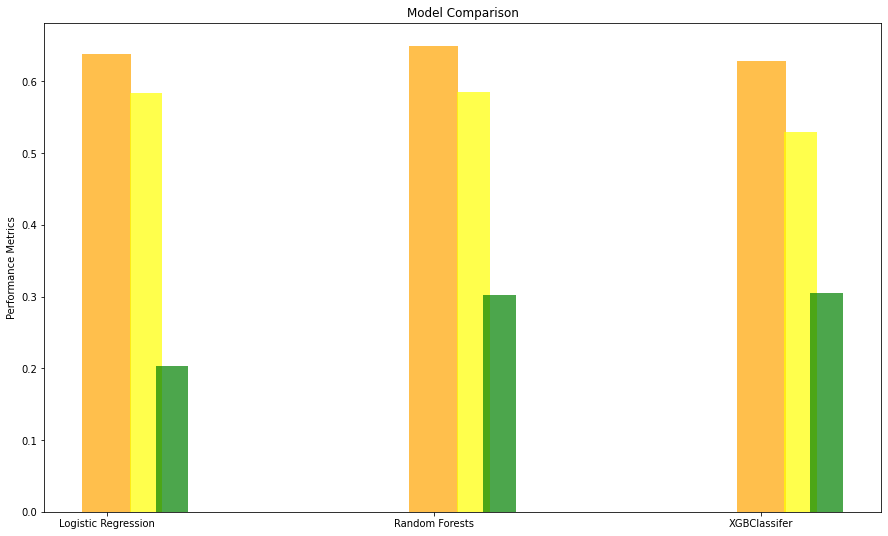

In [ ]:
plt.figure(figsize=(15, 9))
ax = plt.subplot(111)
models = ['Logistic Regression', 'Random Forests' , 'XGBClassifer']
values = [accuracy_lr, accuracy_rf, accuracy_xg]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label= 'accuracy')
plt.xticks(model, models)      
ax = plt.subplot(111)

models = ['Logistic Regression', 'Random Forests' , 'XGBClassifer']
values = [precision_lr, precision_rf, precision_xg]
model = np.arange(len(models))

plt.bar(model+0.12, values, align='center', width = 0.1, alpha=0.7, color = 'yellow', label = 'precision')
plt.xticks(model, models)
ax = plt.subplot(111)

models = ['Logistic Regression', 'Random Forests' , 'XGBClassifer' ]
values = [recall_lr, recall_rf, recall_xg, ]
model = np.arange(len(models))

plt.bar(model+0.2, values, align='center', width = 0.1, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)
plt.ylabel('Performance Metrics')
plt.title('Model Comparison')
    
# removing the axis on the top and right of the plot window
plt.show()  

In [ ]:
df3=pd.DataFrame({'Predicted': pred3})

In [ ]:
df3

,Predicted
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
15065,0.0
15066,0.0
15067,0.0
15068,0.0


In [ ]:
df3.to_csv(r'/content/Prediction.csv', index=False)